In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import random

In [218]:
#Define options, rates, and costs for boat rental options
price_table = pd.DataFrame(columns=['Options','Time','Price'])
price_table['Options'] = ['No Sale','1hr Rental', '3hr Rental', 'Day Rental']
price_table['Time'] = [1.5,1,3,8]
price_table['Price'] = [0,30,75,200]

gas = 4 #est fuel cost in $/gallon
economy = 10 #est fuel economy for the boats, in miles per gallon
price_table['Est. Gas Cost'] = [0,5/economy*gas, 12/economy*gas, 15/economy*gas]
price_table['Est. Gas Cost'] = np.round(price_table['Est. Gas Cost'],2)

price_table['Weekday Odds'] = list(np.array([35,40,15,10])/100)
price_table['Weekend Odds'] = list(np.array([10,50,17,23])/100)


price_table

,Options,Time,Price,Est. Gas Cost,Weekday Odds,Weekend Odds
0,No Sale,1.5,0,0.0,0.35,0.10
1,1hr Rental,1.0,30,2.0,0.40,0.50
2,3hr Rental,3.0,75,4.8,0.15,0.17
3,Day Rental,8.0,200,6.0,0.10,0.23


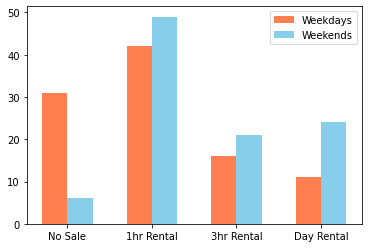

In [219]:
# define and test sample distributions for each rental option, variable by day type

rental_options = list(price_table['Options'])
weekday_probabilities = list(price_table['Weekday Odds'])
weekend_probabilities = list(price_table['Weekend Odds'])

size = 100
weekdays = list(np.random.choice(rental_options,
                                 size=size, 
                                 p=weekday_probabilities))

weekends = list(np.random.choice(rental_options,
                                 size=size, 
                                 p=weekend_probabilities))
rental_counts = {}
for option in rental_options:
    weekday_count = weekdays.count(option)
    weekend_count = weekends.count(option)
    
    rental_counts[option] = [weekday_count, weekend_count]
    
width = 0.3
plt.bar(rental_counts.keys(), np.array(list(rental_counts.values()))[:,0], label='Weekdays',
       align='edge', width = -width, color = 'coral')
plt.bar(rental_counts.keys(), np.array(list(rental_counts.values()))[:,1], label='Weekends',
       align='edge', width = width, color = 'skyblue')

plt.legend();

In [220]:
weeks = 10
transactions_by_day = pd.DataFrame(columns=['Transactions', 'Declined Tx'], index=range(1,weeks*7+1))

transactions_by_day['Transactions'] = transactions_by_day['Transactions'].astype(object)
transactions_by_day['Declined Tx'] = transactions_by_day['Declined Tx'].astype(object)


day_counter = 0
for day in transactions_by_day.index:
    day_counter += 1
    if day_counter < 6:
        p = weekday_probabilities
        day_type = 'Weekday'
        #print(day, 'week day :(')
    elif day_counter == 6:
        p = weekend_probabilities
        day_type = 'Weekend'
        #print(day, 'weekend!!(')
    elif day_counter == 7:
        p = weekend_probabilities
        day_counter = 0
        #print(day, 'weekend!!(')
    
    # assuming 10 hours of operation each day, each with a blank slate
    op_hours = 10
    used_hours = 0
    daily_tx = []
    tx_declined = []
    daily_income = 0
    daily_cost = 0
    
    while op_hours > 0:
        # a random customer approaches and wants option TX
        desired_tx = list(np.random.choice(rental_options,size=1, p=p))[0]
        # pull the TX info from the price table
        tx_info = price_table[price_table['Options'] == desired_tx]
        
        # process the tx if there is time left in the day
        if float(tx_info['Time']) <= op_hours or desired_tx == 'No Sale':
            # add this TX to the daily ledger
            daily_tx.append(desired_tx)
            # record the time the boat was used
            if desired_tx != 'No Sale':
                used_hours = used_hours + float(tx_info['Time'])
            # also subtract that time from the operating hours
            op_hours = op_hours - float(tx_info['Time'])
            # add money earned to the daily income & cost to daily cost
            daily_income = daily_income + float(tx_info['Price'])
            daily_cost = daily_cost + float(tx_info['Est. Gas Cost'])
        else:
            tx_declined.append(desired_tx)
    
    # add this data to the dataframe
    transactions_by_day.at[day, 'Income'] = daily_income
    transactions_by_day.at[day, 'Cost'] = daily_cost
    transactions_by_day.at[day, 'Transactions'] = daily_tx
    transactions_by_day.at[day, 'Used Hours'] = used_hours
    transactions_by_day.at[day, 'Declined Tx'] = list(tx_declined)
    transactions_by_day.at[day, 'Day Type'] = day_type

    
all_tx = sum(transactions_by_day['Transactions'], [])
declined_tx = sum(transactions_by_day['Declined Tx'], [])
all_income = list(transactions_by_day['Income'])
all_cost = list(transactions_by_day['Cost'])
used_hours = list(transactions_by_day['Used Hours'])

total_income = np.round(sum(all_income),2)
total_cost = np.round(sum(all_cost),2)

print(f'\nTotal income: ${total_income:,} \nTotal Gas Expense: ${total_cost:,}\n\
Net Profit: ${total_income-total_cost:,}\n\n')

transactions_by_day


Total income: $13,460.0 
Total Gas Expense: $789.6
Net Profit: $12,670.4




,Transactions,Declined Tx,Income,Cost,Used Hours,Day Type
1,"[No Sale, No Sale, 1hr Rental, 3hr Rental, No ...",[Day Rental],135.0,8.8,5.0,Weekday
2,"[1hr Rental, 1hr Rental, 1hr Rental, No Sale, ...","[3hr Rental, 3hr Rental, 1hr Rental, 3hr Renta...",150.0,10.0,5.0,Weekday
3,"[1hr Rental, Day Rental, No Sale]",[],230.0,8.0,9.0,Weekday
4,"[1hr Rental, 1hr Rental, 1hr Rental, 1hr Renta...","[Day Rental, Day Rental]",225.0,14.8,8.0,Weekday
5,"[3hr Rental, No Sale, 3hr Rental, No Sale, No ...","[3hr Rental, 3hr Rental, 3hr Rental, Day Rental]",150.0,9.6,6.0,Weekday
...,...,...,...,...,...,...
66,"[No Sale, No Sale, 3hr Rental, 1hr Rental, 3hr...",[],180.0,11.6,7.0,Weekday
67,"[3hr Rental, No Sale, 1hr Rental, 1hr Rental, ...","[Day Rental, 1hr Rental, 3hr Rental, 1hr Renta...",225.0,14.8,8.0,Weekday
68,"[Day Rental, 1hr Rental, No Sale]",[],230.0,8.0,9.0,Weekday
69,"[Day Rental, 1hr Rental, 1hr Rental]","[Day Rental, Day Rental, 3hr Rental, Day Rental]",260.0,10.0,10.0,Weekend


In [221]:
#stacked bar for each day
color_dict = dict.fromkeys(rental_options, None)
color_dict['No Sale'] = [0,0,0,0]
color_dict['1hr Rental'] = 'lightgreen'
color_dict['3hr Rental'] = 'lightskyblue'
color_dict['Day Rental'] = 'violet'

time_dict = dict(zip(rental_options, list(price_table['Time'])))

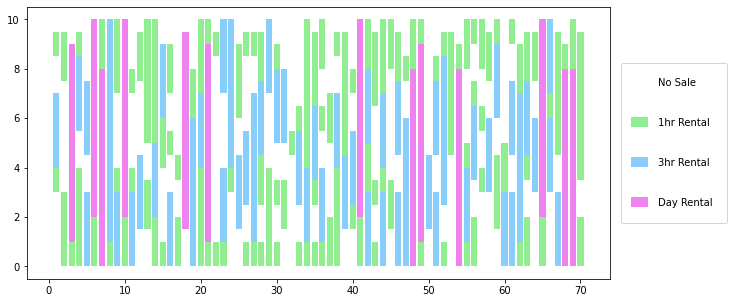

In [222]:
fig, ax = plt.subplots(figsize=(12,5))
plt.subplots_adjust(right=0.8)
ax.set_ylim(-0.5,10.5)
#ax.margins(0.5,0.5)
legend_lines = []

for option in rental_options:
    line = Line2D([0],[0], color = color_dict[option], lw=10, label = option)
    legend_lines.append(line)


for day in transactions_by_day.index:
    transactions = transactions_by_day.iloc[day-1]['Transactions']
    h = 0
    for n, tx in enumerate(transactions):
        ax.bar(day, time_dict[tx], color = color_dict[tx], bottom=h, align='center')
        h += time_dict[tx]
        
plt.legend(legend_lines, rental_options, loc = 'center left', bbox_to_anchor=(1.01,0.5), handlelength=0.7, labelspacing=3,
          handletextpad=1.5, borderpad=1.5);

In [223]:
# add some variability in how long each renter is actually out, and a 20 min cleaning period between each renter

In [288]:
weeks = 10
transactions_by_day = pd.DataFrame(columns=['Transactions', 'Declined Tx', 'Tx Times'], index=range(1,weeks*7+1))

transactions_by_day['Transactions'] = transactions_by_day['Transactions'].astype(object)
transactions_by_day['Declined Tx'] = transactions_by_day['Declined Tx'].astype(object)
transactions_by_day['Tx Times'] = transactions_by_day['Tx Times'].astype(object)


day_counter = 0
for day in transactions_by_day.index:
    day_counter += 1
    if day_counter < 6:
        p = weekday_probabilities
        day_type = 'Weekday'
        #print(day, 'week day :(')
    elif day_counter == 6:
        p = weekend_probabilities
        day_type = 'Weekend'
        #print(day, 'weekend!!(')
    elif day_counter == 7:
        p = weekend_probabilities
        day_counter = 0
        #print(day, 'weekend!!(')
    
    # assuming 10 hours of operation each day, each with a blank slate
    op_hours = 10
    used_hours = 0
    daily_tx = []
    daily_times = []
    tx_declined = []
    daily_income = 0
    daily_cost = 0
    
    while op_hours > 0:
        # a random customer approaches and wants option TX
        desired_tx = list(np.random.choice(rental_options,size=1, p=p))[0]
        # pull the TX info from the price table
        tx_info = price_table[price_table['Options'] == desired_tx]
        # process the tx if there is time left in the day
        if float(tx_info['Time']) <= op_hours or desired_tx == 'No Sale':
            # add this TX to the daily ledger
            daily_tx.append(desired_tx)
            # add some variability for how long the boat is actually used
            time = float(tx_info['Time'])
            actual_time = 0.7*time + time*0.35*random.random()
            #store for later
            daily_times.append(actual_time)
            # record the time the boat was used
            if desired_tx != 'No Sale':
                used_hours = used_hours + actual_time
            # also subtract that time from the operating hours, and factor in 20min cleaning time
            op_hours = op_hours - actual_time - 0.3
            # add money earned to the daily income & cost to daily cost
            daily_income = daily_income + float(tx_info['Price'])
            daily_cost = daily_cost + float(tx_info['Est. Gas Cost'])
        else:
            tx_declined.append(desired_tx)
    
    # add this data to the dataframe
    transactions_by_day.at[day, 'Income'] = daily_income
    transactions_by_day.at[day, 'Cost'] = daily_cost
    transactions_by_day.at[day, 'Transactions'] = daily_tx
    transactions_by_day.at[day, 'Used Hours'] = used_hours
    transactions_by_day.at[day, 'Declined Tx'] = list(tx_declined)
    transactions_by_day.at[day, 'Day Type'] = day_type
    transactions_by_day.at[day, 'Tx Times'] = daily_times

    
all_tx = sum(transactions_by_day['Transactions'], [])
declined_tx = sum(transactions_by_day['Declined Tx'], [])
all_income = list(transactions_by_day['Income'])
all_cost = list(transactions_by_day['Cost'])
used_hours = list(transactions_by_day['Used Hours'])

total_income = np.round(sum(all_income),2)
total_cost = np.round(sum(all_cost),2)

used_hrs = sum(used_hours)
op_hrs = weeks*7*10
percent_used = np.round(used_hrs/op_hrs*100,2)

print(f'\nTotal income: ${total_income:,} \nTotal Gas Expense: ${total_cost:,}\n\
Net Profit: ${total_income-total_cost:,}\n\n')

transactions_by_day


Total income: $12,600.0 
Total Gas Expense: $698.4
Net Profit: $11,901.6




,Transactions,Declined Tx,Tx Times,Income,Cost,Used Hours,Day Type
1,"[1hr Rental, No Sale, 1hr Rental, No Sale, 1hr...","[Day Rental, 3hr Rental, 3hr Rental]","[0.7606882973232888, 1.2998547068091835, 0.830...",150.0,10.0,4.229717,Weekday
2,"[1hr Rental, 1hr Rental, No Sale, No Sale, No ...","[Day Rental, 1hr Rental, 3hr Rental, 1hr Renta...","[0.7180287903968451, 0.7154347451516181, 1.290...",90.0,6.0,2.359469,Weekday
3,"[No Sale, No Sale, No Sale, No Sale, 3hr Renta...","[Day Rental, Day Rental, 1hr Rental, 1hr Rental]","[1.535546636320065, 1.253512840781622, 1.17445...",75.0,4.8,2.944202,Weekday
4,"[Day Rental, 1hr Rental, 1hr Rental, No Sale]",[],"[5.823037090770823, 0.9340116705853816, 0.8536...",260.0,10.0,7.610718,Weekday
5,"[3hr Rental, No Sale, No Sale, 1hr Rental, 1hr...","[Day Rental, Day Rental, Day Rental]","[2.2061954690667624, 1.5268475740586074, 1.389...",135.0,8.8,3.949246,Weekday
...,...,...,...,...,...,...,...
66,"[No Sale, 1hr Rental, 3hr Rental, No Sale, 1hr...","[1hr Rental, 3hr Rental]","[1.0627298255897288, 0.8814270585306236, 2.168...",165.0,10.8,4.748263,Weekday
67,"[1hr Rental, 3hr Rental, 3hr Rental, No Sale, ...","[1hr Rental, Day Rental, Day Rental, 1hr Renta...","[0.773166018643815, 2.3110021874361535, 3.1128...",210.0,13.6,6.909708,Weekday
68,"[3hr Rental, 1hr Rental, No Sale, 1hr Rental, ...","[1hr Rental, Day Rental]","[2.1177710314001024, 0.8836387772670934, 1.199...",165.0,10.8,4.590131,Weekday
69,"[Day Rental, 1hr Rental, No Sale]","[Day Rental, 1hr Rental]","[8.387654973441629, 0.7365468613223278, 1.2687...",230.0,8.0,9.124202,Weekend


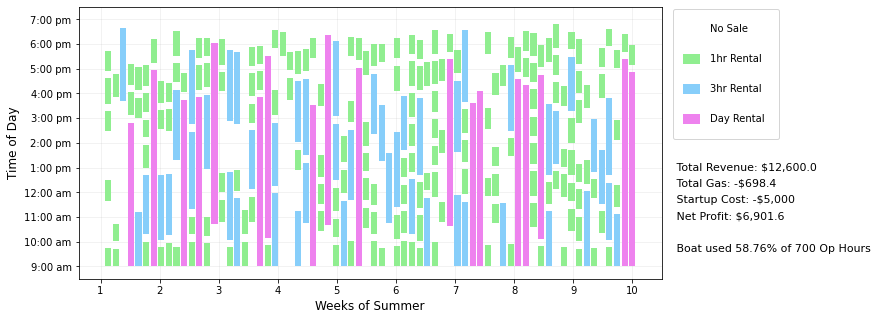

In [295]:
fig, ax = plt.subplots(figsize=(12,5))
plt.subplots_adjust(right=0.8)
ax.set_ylim(-0.5,10.5)
ax.set_yticks(np.arange(0,11,1))
ax.set_xticks(np.linspace(0, weeks*7, weeks))
op_hours = [f'{i}:00 am' for i in range(9,13,1)] + [f'{i}:00 pm' for i in range(1,8,1)]
ax.set_yticklabels(op_hours)
ax.set_xticklabels(np.arange(1,weeks+1,1))

ax.grid(alpha=0.2)
ax.set_axisbelow(True)
#ax.margins(0.5,0.5)
legend_lines = []

for option in rental_options:
    line = Line2D([0],[0], color = color_dict[option], lw=10, label = option)
    legend_lines.append(line)


for day in transactions_by_day.index:
    transactions = transactions_by_day.iloc[day-1]['Transactions']
    tx_times = transactions_by_day.iloc[day-1]['Tx Times']
    h = 0
    for n, tx in enumerate(transactions):
        ax.bar(day, tx_times[n], color = color_dict[tx], bottom=h, align='center')
        h += tx_times[n] + 0.3
        
plt.xlabel('Weeks of Summer', fontsize=12)
plt.ylabel('Time of Day', fontsize=12)

x_marg = 1.02
ax.annotate(f' Total Revenue: ${total_income:,}\n Total Gas: -${total_cost:,}\n Startup Cost: -$5,000\
\n Net Profit: ${total_income-total_cost-5000:,}\
\n\n Boat used {percent_used}% of {op_hrs} Op Hours',
            xy=(0, 0), xytext=(x_marg,0.43), textcoords='axes fraction', linespacing=1.8,
            horizontalalignment='left', verticalalignment='top', fontsize=11)

plt.legend(legend_lines, rental_options, loc = 'upper left', bbox_to_anchor=(1.01,1.01), handlelength=0.7, labelspacing=2,
          handletextpad=1.5, borderpad=1.5);